# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./SINASC_RO_2019.csv',na_values='NA')
print(df.shape)

(27028, 69)


In [2]:
estado_civil_dict = { 1: 'Solteira',
                      2: 'Casada',
                      3: 'Viúva',
                      4: 'Separado judicialmente/Divorciado',
                      9: 'Ignorado'
                         }
type(estado_civil_dict)

dict

In [3]:
df['ESTCIVMAE'] = df['ESTCIVMAE'].map(estado_civil_dict)
df['ESTCIVMAE'].value_counts()

ESTCIVMAE
Casada                               9924
Solteira                             8952
Separado judicialmente/Divorciado     453
Ignorado                              145
Viúva                                  57
Name: count, dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.(matplotlib)

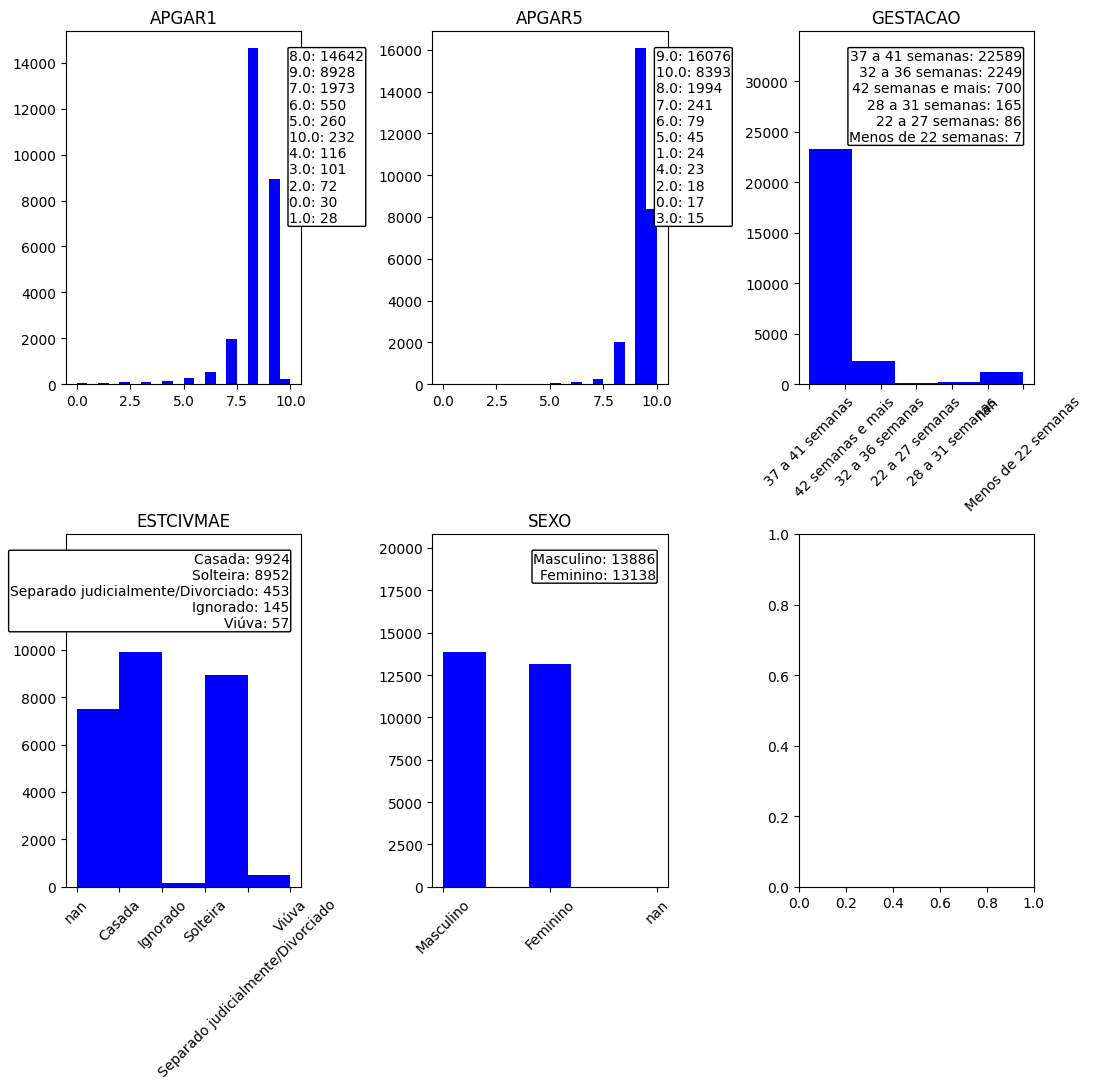

In [4]:
features1 = ['APGAR1', 'APGAR5', 'GESTACAO', 'ESTCIVMAE','SEXO']
def coord_generator(lin, col):
    cord =[]
    for i in range(lin):
        for j in range(col):
            cord.append(i)
            cord.append(j)
    return cord
def plotter(df, features):
    coor=[0,0,0,1,0,2,1,0,1,1]
    fig, axs = plt.subplots(2, 3, figsize=(11,11))
    k=0
       
    for feature in features:        
        if df[feature].dtype == 'object':            
            counts, bins, patches = axs[coor[k], coor[k+1]].hist(df[feature].astype(str), bins=5)
            axs[coor[k],coor[k+1]].hist(df[feature].astype(str),bins=5,color='blue')
            axs[coor[k],coor[k+1]].tick_params(axis='x',labelrotation=45)
            axs[coor[k],coor[k+1]].set_title(feature)
            axs[coor[k], coor[k+1]].set_ylim(0, counts.max()*1.5)
            value_counts = df[feature].value_counts()
            summary_text = '\n'.join([f'{status}: {count}' for status, count in value_counts.items()])
            axs[coor[k],coor[k+1]].text(0.95, 0.95, summary_text,
                                        horizontalalignment='right', 
                                        verticalalignment='top', 
                                        transform=axs[coor[k],coor[k+1]].transAxes, 
                                        bbox=dict(facecolor='white', 
                                                  edgecolor='black', 
                                                  boxstyle='round,pad=0.1'))    
            k+=2                 
                                    
        else:
            value_counts = df[feature].value_counts()
            summary_text = '\n'.join([f'{status}: {count}' for status, count in value_counts.items()])
            axs[coor[k],coor[k+1]].hist(df[feature],bins=20,color='blue')
            axs[coor[k],coor[k+1]].set_title(feature)
            axs[coor[k],coor[k+1]].set_title(feature)
            axs[coor[k],coor[k+1]].text(0.95, 0.95, summary_text,
                                        horizontalalignment='left', 
                                        verticalalignment='top', 
                                        transform=axs[coor[k],coor[k+1]].transAxes, 
                                        bbox=dict(facecolor='white', 
                                                  edgecolor='black', 
                                                  boxstyle='round,pad=0.1'))
            k+=2
            
    plt.tight_layout()
    plt.show()   

plotter(df, features1) 

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.(Seaborn)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


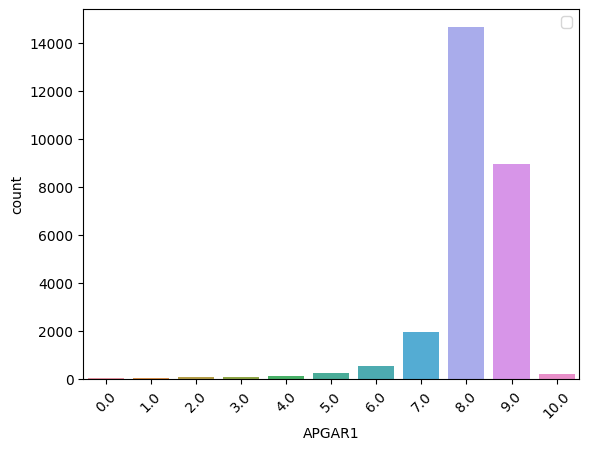

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


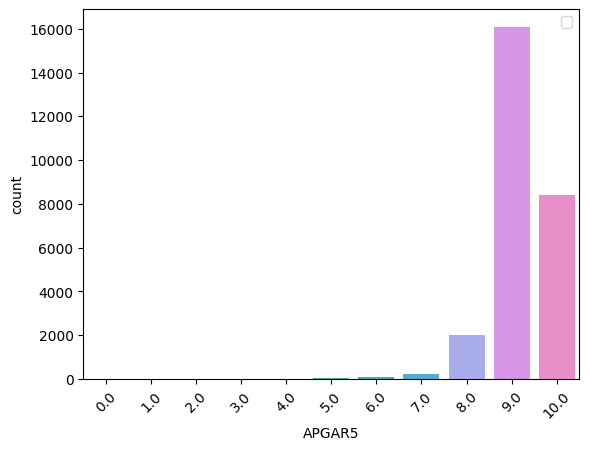

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


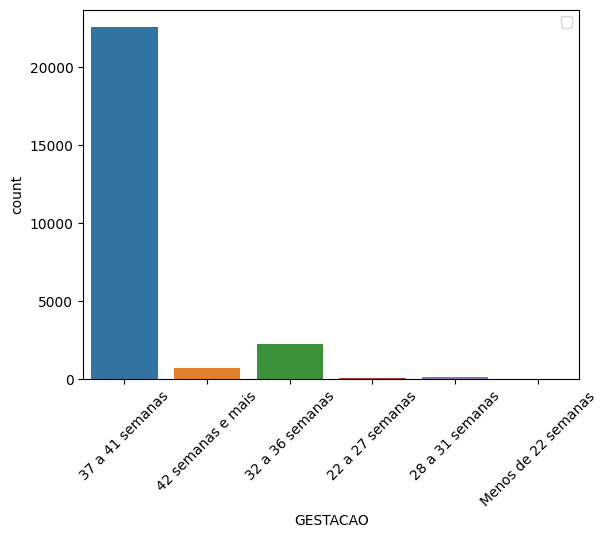

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


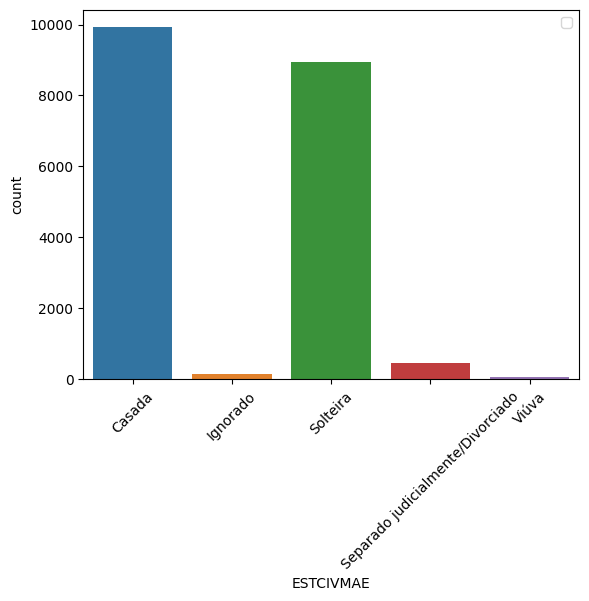

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


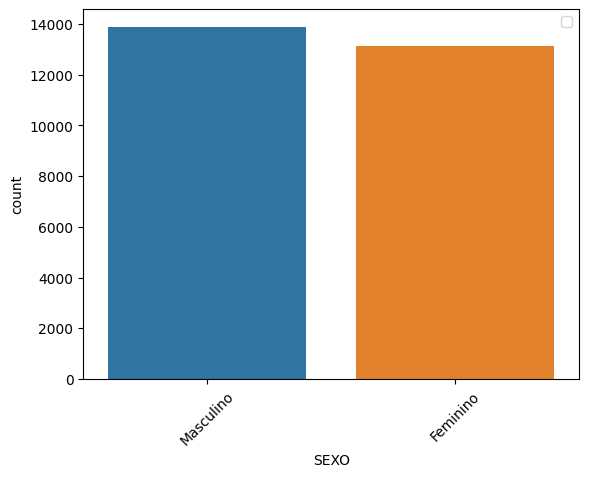

In [5]:
for feature in features1:   
    sns.countplot(x=feature,data=df)
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

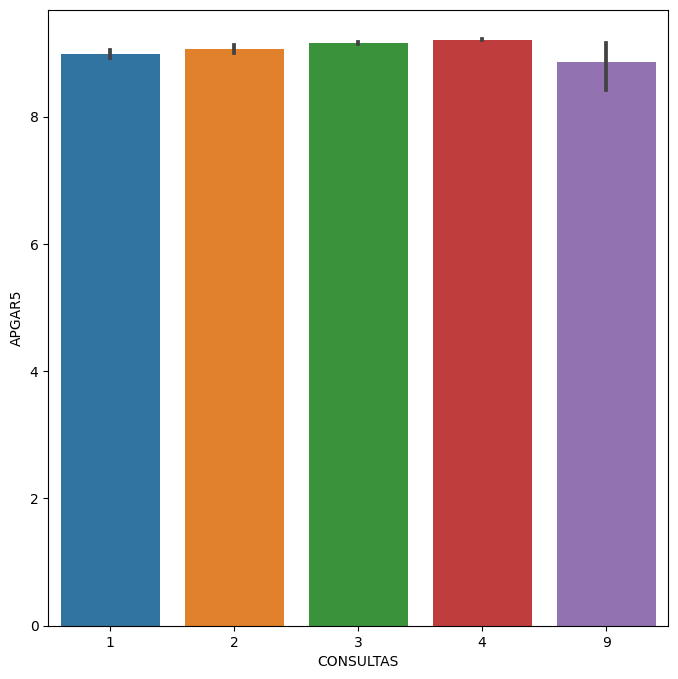

In [61]:
sns.barplot(x='CONSULTAS',y='APGAR5',data=df)


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

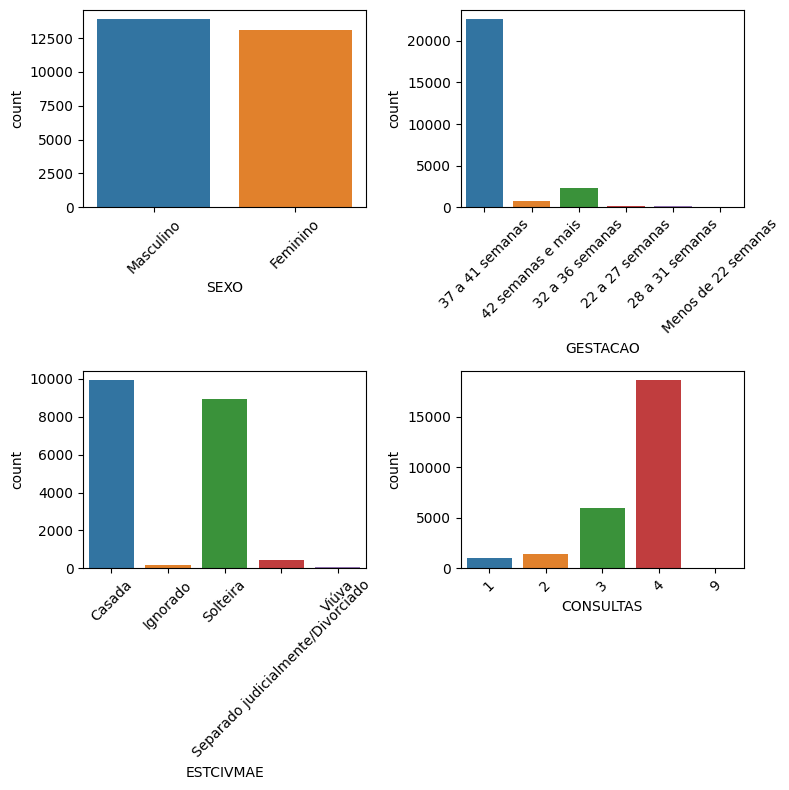

In [58]:
features12 = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']
plt.close('all')
plt.rc('figure', figsize=(8,8))
fig, axes = plt.subplots(2,2)
k=0
coor=coord_generator(2,2)

for feature in features12:    
    if k < len(feature):    
        sns.countplot(ax = axes[coor[k],coor[k+1]],x=feature, data=df,)  
        axes[coor[k],coor[k+1]].tick_params(axis='x', rotation=45)        
        k+=2
    else:
        print(f'end of vector "features"')
        k+=2
plt.tight_layout()

    





   